In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/finalTrain.csv')
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [3]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [5]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [7]:
df.shape

(45584, 20)

In [9]:
df.duplicated().sum() # No duplicated record , if there were any we wolud have use df.dropduplicates

0

In [6]:
df.isnull().sum() # Checking the null values in the Dataset

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [7]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
# Getting all the columns with the nul values

In [8]:
features_with_na

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Time_Orderd',
 'Weather_conditions',
 'Road_traffic_density',
 'multiple_deliveries',
 'Festival',
 'City']

In [32]:
# Syntax to change column name using rename() function.
df = df.rename(columns={"Time_taken (min)":"Time_taken"})

<Axes: xlabel='Delivery_person_Ratings', ylabel='Time_taken'>

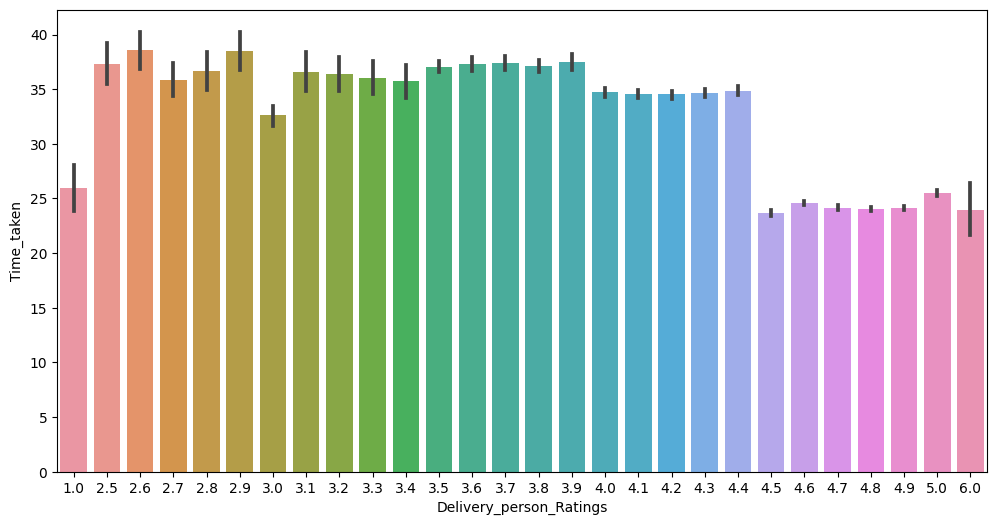

In [33]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x = "Delivery_person_Ratings",y= "Time_taken",data=df)

In [ ]:
# we can see that that when the ratings are huigh the time taken is low

In [41]:
df['Order_day'] = df['Order_Date'].str.split('-').str[0]
df['Order_month'] = df['Order_Date'].str.split('-').str[1]
df['Order_year'] = df['Order_Date'].str.split('-').str[2]

In [42]:
df.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Order_day,Order_month,Order_year
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,02,2022
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,02,2022


In [55]:
df['Order_day'] = df['Order_day'].astype(int)
df['Order_month'] = df['Order_month'].astype(int)
df['Order_year'] = df['Order_year'].astype(int)

In [48]:
df['Order_month'] = df['Order_month'].str.split('0').str[1]

In [50]:
df['Order_month']

0        2
1        2
2        3
3        2
4        2
        ..
45579    3
45580    2
45581    3
45582    3
45583    3
Name: Order_month, Length: 45584, dtype: object

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [57]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Order_day,Order_month,Order_year
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2,2022
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2,2022
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3,2022
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2,2022
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,1,Snack,scooter,1.0,No,Metropolitian,41,14,2,2022


In [58]:
df.drop('Order_Date',axis=1,inplace=True)

In [59]:
df.head(1)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Order_day,Order_month,Order_year
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2,2022


In [71]:

# Converting the time ordered format
df.head() 

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Order_day,Order_month,Order_year,Time_ordered_hours,Time_ordered_min
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,...,motorcycle,3.0,No,Metropolitian,46,12,2,2022,21,55
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,...,motorcycle,1.0,No,Metropolitian,23,13,2,2022,14,55
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,...,scooter,1.0,No,Metropolitian,21,4,3,2022,17,30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,...,motorcycle,0.0,No,Metropolitian,20,13,2,2022,09,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,...,scooter,1.0,No,Metropolitian,41,14,2,2022,19,50


In [86]:
df['Time_ordered_hours'] = df['Time_Orderd'].str.split(":").str[0]
df['Time_ordered_min'] = df['Time_Orderd'].str.split(':').str[1]

In [96]:
print(df['Time_ordered_hours'].isnull().sum())
print(df['Time_ordered_min'].isnull().sum())

0
0


In [95]:
df['Time_ordered_hours'] = df['Time_ordered_hours'].fillna(0)
df['Time_ordered_min'] = df['Time_ordered_min'].fillna(0)

In [100]:
#df['Time_ordered_hours'] = df['Time_ordered_hours'].astype(int)
df['Time_ordered_min'] = df['Time_ordered_min'].astype(int)

In [102]:
df['Time_ordered_hours'] = df['Time_ordered_hours'].astype(float)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Time_Orderd                  43853 non-null  object 
 9   Time_Order_picked            45584 non-null  object 
 10  Weather_conditions           44968 non-null  object 
 11  Road_traffic_density         44983 non-null  object 
 12  Vehicle_condition            45584 non-null  int64  
 13  Type_of_order   

In [104]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Order_day,Order_month,Order_year,Time_ordered_hours,Time_ordered_min
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,...,motorcycle,3.0,No,Metropolitian,46,12,2,2022,21.0,55
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,...,motorcycle,1.0,No,Metropolitian,23,13,2,2022,14.0,55
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,...,scooter,1.0,No,Metropolitian,21,4,3,2022,17.0,30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,...,motorcycle,0.0,No,Metropolitian,20,13,2,2022,9.0,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,...,scooter,1.0,No,Metropolitian,41,14,2,2022,19.0,50


In [115]:
round(df['Time_ordered_min'])

0        0.92
1        0.92
2        0.50
3        0.33
4        0.83
         ... 
45579    0.58
45580    0.92
45581    0.83
45582    0.58
45583    0.17
Name: Time_ordered_min, Length: 45584, dtype: float64

In [118]:
time_ordered_var = df['Time_ordered_hours']*60+df['Time_ordered_min']

In [120]:
#Time_Order_picked

df['Time_Order_picked_hours'] = df['Time_Order_picked'].str.split(":").str[0]
df['Time_Order_picked_minutes'] = df['Time_Order_picked'].str.split(':').str[1]
df['Time_Order_picked_hours'] = df['Time_Order_picked_hours'].fillna(0)
df['Time_Order_picked_minutes'] = df['Time_Order_picked_minutes'].fillna(0)

In [128]:
df['Time_Order_picked_hours'] = df['Time_Order_picked_hours'].astype(float)
df['Time_Order_picked_minutes'] = df['Time_Order_picked_hours'].astype(int)

In [124]:
df.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,...,Festival,City,Time_taken,Order_day,Order_month,Order_year,Time_ordered_hours,Time_ordered_min,Time_Order_picked_hours,Time_Order_picked_minutes
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,...,No,Metropolitian,46,12,2,2022,21.0,55,22,22.0
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,...,No,Metropolitian,23,13,2,2022,14.0,55,15,15.0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Time_Orderd                  43853 non-null  object 
 9   Time_Order_picked            45584 non-null  object 
 10  Weather_conditions           44968 non-null  object 
 11  Road_traffic_density         44983 non-null  object 
 12  Vehicle_condition            45584 non-null  int64  
 13  Type_of_order   

In [130]:
time_ordered_picked = df['Time_Order_picked_hours']*60 + df['Time_Order_picked_minutes']

In [139]:
time_ordered_picked/60

0        22.366667
1        15.250000
2        17.283333
3         9.150000
4        20.333333
           ...    
45579    11.183333
45580    20.333333
45581    24.400000
45582    13.216667
45583    17.283333
Length: 45584, dtype: float64

In [140]:
time_ordered_var/60

0        21.916667
1        14.916667
2        17.500000
3         9.333333
4        19.833333
           ...    
45579    11.583333
45580    19.916667
45581    23.833333
45582    13.583333
45583    17.166667
Length: 45584, dtype: float64

In [ ]:
var

In [141]:
time_difference = time_ordered_picked - time_ordered_var

In [142]:
time_difference

0        27.0
1        20.0
2       -13.0
3       -11.0
4        30.0
         ... 
45579   -24.0
45580    25.0
45581    34.0
45582   -22.0
45583     7.0
Length: 45584, dtype: float64

In [138]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,...,Festival,City,Time_taken,Order_day,Order_month,Order_year,Time_ordered_hours,Time_ordered_min,Time_Order_picked_hours,Time_Order_picked_minutes
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,11:35,11:45,...,No,Metropolitian,32,24,3,2022,11.0,35,11.0,11
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,19:55,20:10,...,No,Metropolitian,36,16,2,2022,19.0,55,20.0,20
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,23:50,24:05:00,...,No,Metropolitian,16,11,3,2022,23.0,50,24.0,24
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,13:35,13:40,...,No,Metropolitian,26,7,3,2022,13.0,35,13.0,13
45583,0x5fb2,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,17:10,17:15,...,No,Metropolitian,36,2,3,2022,17.0,10,17.0,17


In [137]:
15.05-14.55

0.5